In [3]:
#Reading GenoType annotated file of ERAP2
import pandas as pd
ERAP2_GT_anno = pd.read_csv('/hpc/dla_lti/araja/hapsnew/ERAP2/ERAP2_gt_anno_March1.csv')

In [2]:
#Checking rsIDs#
ERAP2_GT_anno['rsIDs']

0     rs144285538
1       rs3733905
2     rs117041256
3      rs75263594
4       rs2549782
5      rs34261036
6     rs148344927
7     rs201986447
8       rs2248374
9     rs151035607
10     rs17408150
11    rs373745801
12    rs150892504
13    rs145600606
14    rs201533372
15    rs142659150
Name: rsIDs, dtype: object

In [3]:
####Simplying the data###
ERAP2_GT_anno.pop('Protein_Consequence')
ERAP2_GT_anno.pop('VEP_Annotation')
ERAP2_GT_anno.pop('Allele Frequency')
ERAP2_GT_anno.pop('Reference')
ERAP2_GT_anno.pop('Alternate')
ERAP2_GT_anno.pop('REF')
ERAP2_GT_anno.pop('ALT')
ERAP2_GT_anno.pop('Allele_Freq')
ERAP2_GT_anno.pop('POS')

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
Name: POS, dtype: float64

##**The genotype data which was originally formatted as phased alleles (e.g., C|C), were parsed and segregated into separate columns representing individual alleles per sample. For example individuals with sample IDs such as 3856798a and 3856798b, the first column recorded the first allele (C), while the second column captured the second allele (C). This transformation facilitates haplotype analysis by allowing independent assessment of allelic inheritance patterns across loci.**##

In [4]:
from string import ascii_lowercase
col=ERAP2_GT_anno.columns[1:166992]
dfs = []
for col in ERAP2_GT_anno.columns[1:166992]:
    d = ERAP2_GT_anno[col].str.split('|', expand=True)
    c = d.shape[1]
    d.columns = [col + l for l in ascii_lowercase[:c]]
    dfs.append(d)
    
clean_df = pd.concat(dfs, axis=1)
clean_df

,3856798a,3856798b,1684021a,1684021b,2365580a,2365580b,4866862a,4866862b,5133998a,5133998b,...,2278245b,2686110a,2686110b,1085546a,1085546b,3156158a,3156158b,4198099a,4198099b,rsIDsa
0,C,C,C,C,C,C,C,C,C,C,...,C,C,C,C,C,C,C,C,C,rs144285538
1,C,C,C,C,C,C,C,C,C,C,...,C,C,C,C,C,C,C,C,C,rs3733905
2,T,T,T,T,T,T,T,T,T,T,...,T,T,T,T,T,T,T,T,T,rs117041256
3,C,C,C,C,C,C,C,T,C,C,...,C,C,C,C,C,C,C,C,C,rs75263594
4,T,T,T,T,T,G,T,T,T,G,...,G,T,G,T,G,T,G,T,G,rs2549782
5,T,T,T,T,T,T,T,T,T,T,...,T,T,T,T,T,T,T,T,T,rs34261036
6,G,G,G,G,G,G,G,G,G,G,...,G,G,G,G,G,G,G,G,G,rs148344927
7,G,G,G,G,G,G,G,G,G,G,...,G,G,G,G,G,G,G,G,G,rs201986447
8,G,G,G,G,G,A,G,G,G,A,...,A,G,A,G,A,G,A,G,A,rs2248374
9,C,C,C,C,C,C,C,C,C,C,...,C,C,C,C,C,C,C,C,C,rs151035607


In [5]:
###Transposing the data to have rsIDs in columns to assemble haplotypes for individuals in rows####
ERAP2_Haps_t=clean_df.T
ERAP2_Haps_t.columns = ERAP2_Haps_t.iloc[333980]
ERAP2_Haps_t = ERAP2_Haps_t[:-1]
ERAP2_Haps_t

rsIDsa,rs144285538,rs3733905,rs117041256,rs75263594,rs2549782,rs34261036,rs148344927,rs201986447,rs2248374,rs151035607,rs17408150,rs373745801,rs150892504,rs145600606,rs201533372,rs142659150
3856798a,C,C,T,C,T,T,G,G,G,C,T,T,C,C,C,A
3856798b,C,C,T,C,T,T,G,G,G,C,T,T,C,C,C,A
1684021a,C,C,T,C,T,T,G,G,G,C,T,T,C,C,C,A
1684021b,C,C,T,C,T,T,G,G,G,C,T,T,C,C,C,A
2365580a,C,C,T,C,T,T,G,G,G,C,T,T,C,C,C,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085546b,C,C,T,C,G,T,G,G,A,C,A,T,C,C,C,A
3156158a,C,C,T,C,T,T,G,G,G,C,T,T,C,C,C,A
3156158b,C,C,T,C,G,T,G,G,A,C,A,T,C,C,C,A
4198099a,C,C,T,C,T,T,G,G,G,C,T,T,C,C,C,A


In [6]:
####Dropping duplicate haplotypes####
ERAP2HapsTablewithrsIDsnoDup=ERAP2_Haps_t.drop_duplicates()
ERAP2HapsTablewithrsIDsnoDup

rsIDsa,rs144285538,rs3733905,rs117041256,rs75263594,rs2549782,rs34261036,rs148344927,rs201986447,rs2248374,rs151035607,rs17408150,rs373745801,rs150892504,rs145600606,rs201533372,rs142659150
3856798a,C,C,T,C,T,T,G,G,G,C,T,T,C,C,C,A
2365580b,C,C,T,C,G,T,G,G,A,C,T,T,C,C,C,A
4866862b,C,C,T,T,T,T,G,G,G,C,T,T,C,C,C,A
1273066b,C,C,T,C,G,T,G,G,A,C,A,T,C,C,C,A
1223830a,C,C,G,C,G,T,G,G,A,C,T,T,C,C,C,A
4062502a,C,C,T,C,G,G,G,G,A,C,T,T,C,C,C,A
3262739a,C,C,T,C,G,T,G,G,A,C,T,T,C,T,C,A
1121792b,C,C,T,C,T,T,G,G,G,C,T,T,T,C,C,A
3725335b,C,C,T,C,T,T,G,G,G,T,T,T,C,C,C,A
3793121a,C,T,T,C,G,T,G,G,A,C,T,T,C,C,C,A


In [11]:
####Number of ERAP2 haplotypes in European population####
rows=ERAP2HapsTablewithrsIDsnoDup.shape[0]
rows

27

Nomencleature of ERAP2 haplotypes is done based on 1000Genome nomenclature (Raja and Kuiper 2023 -Gene and Immunity)

**Converting HAPLOTYPES into Protein coding ALLOTYPES using protein consequences data corresponding to rsIDs and then converting three letter protein code to one letter amino acid**

In [40]:
###Reading haplotypes file after renaming haplotypes based on nomenclature####
genotype_df = pd.read_csv("/hpc/dla_lti/araja/hapsnew/ERAP2/ERAP2haps_nucleotide_nomeclature.csv")
###Reading the protein consequences dataframe (rsIDs and their corresponding Protein consequences####
protein_df = pd.read_csv("/hpc/dla_lti/araja/hapsnew/ERAP2/ERAP2protein_file.csv")
#Reading the amino acid single letter file (three letter amino acids from Protein_df with their corresponding one letter representation####
amino_acid_single_df = pd.read_csv('/hpc/dla_lti/araja/hapsnew/ERAP2/AminoAcidSingle.csv')
amino_acid_single_df.columns = amino_acid_single_df.columns.str.strip()
amino_acid_dict = amino_acid_single_df.set_index('AminoAcid')['Letter'].to_dict()
genotype_df_updated = genotype_df.copy()
### Replacing nucleotides with corresponding amino acids to convert haplotypes to allotypes ###
for col in genotype_df.columns:
    if col != 'ERAPHap': ####first column with nomenclature
        rs_num = col
        protein_row = protein_df[protein_df['rsID'] == rs_num]
        if not protein_row.empty:
            reference = protein_row['Reference'].values[0]
            alternate = protein_row['Alternate'].values[0]
            protein_consequence = protein_row['Protein_consequence'].values[0]
            if protein_consequence.startswith("p."):
                ref_aa = protein_consequence[2:5]  
                position = ''.join(filter(str.isdigit, protein_consequence))  
                alt_aa = protein_consequence[-3:]  
            ref_aa_single = amino_acid_dict.get(ref_aa, ref_aa)
            alt_aa_single = amino_acid_dict.get(alt_aa, alt_aa)
            genotype_df_updated[rs_num] = genotype_df[rs_num].replace({reference: ref_aa_single, alternate: alt_aa_single})
            genotype_df_updated.rename(columns={col: col + '+' + position}, inplace=True)

### Creating allotype dataframe ###
allotype_df = genotype_df_updated.copy()
#Applying amino acid dictionary mapping using `.applymap()` across all columns to get single letter
allotype_df.iloc[:, 1:] = allotype_df.iloc[:, 1:].map(lambda x: amino_acid_dict.get(x, x))
allotype_df

,ERAPHap,rs144285538+38,rs3733905+214,rs117041256+289,rs75263594+347,rs2549782+392,rs34261036+411,rs148344927+421,rs201986447+486,rs2248374+486,rs151035607+565,rs17408150+669,rs373745801+718,rs150892504+751,rs145600606+861,rs201533372+865,rs142659150+912
0,ERAP2*06:01,F,P,S,T,N,L,C,S,N,R,L,I,R,A,R,Q
1,ERAP2*01:01:02,F,P,S,T,K,L,C,S,S,R,L,I,R,A,R,Q
2,ERAP2*10:01,F,P,S,T,K,L,C,S,S,R,Q,I,R,A,R,Q
3,ERAP2*08:01,F,P,S,M,N,L,C,S,N,R,L,I,R,A,R,Q
4,ERAP2*04:01,F,P,S,T,K,R,C,S,S,R,L,I,R,A,R,Q
5,ERAP2*02:01,F,L,S,T,K,L,C,S,S,R,L,I,R,A,R,Q
6,ERAP2*05:01,F,P,A,T,K,L,C,S,S,R,L,I,R,A,R,Q
7,ERAP2*06:02,F,P,S,T,N,L,C,S,N,R,L,I,C,A,R,Q
8,ERAP2*06:03,L,P,S,T,N,L,C,S,N,R,L,I,R,A,R,Q
9,ERAP2*01:02,F,P,S,T,K,L,C,S,S,R,L,I,R,V,R,Q


**Haplotypes' Frequency Calculation**

In [52]:
ERAP2_hap_t_new = ERAP2_Haps_t.stack().groupby(level=0).apply(''.join).to_frame('Haps')
ERAP2_hap_t_new
counts = ERAP2_hap_t_new['Haps'].value_counts(normalize=True)
new_names = [
    'ERAP2*06:01', 'ERAP2*01:01:02', 'ERAP2*10:01', 'ERAP2*08:01', 'ERAP2*04:01',
    'ERAP2*02:01', 'ERAP2*05:01', 'ERAP2*06:02', 'ERAP2*06:03', 'ERAP2*01:02',
    'ERAP2*01:03', 'ERAP2*06:04', 'ERAP2*06:05', 'ERAP2*06:06', 'ERAP2*01:04',
    'ERAP2*10:02', 'ERAP2*01:01:01', 'ERAP2*11:01', 'ERAP2*00:01', 'ERAP2*06:07',
    'ERAP2*11:02', 'ERAP2*01:06', 'ERAP2*06:08', 'ERAP2*08:02', 'ERAP2*12:01',
    'ERAP2*06:09', 'ERAP2*10:03'
]

hap_map = {old_name: new_name for old_name, new_name in zip(counts.index, new_names)}

ERAP2_hap_t_new['ERAPHap'] = ERAP2_hap_t_new['Haps'].map(hap_map)
hap_counts = ERAP2_hap_t_new['ERAPHap'].value_counts()
hap_freq_raw = ERAP2_hap_t_new['ERAPHap'].value_counts(normalize=True) 
hap_freq_percentage = hap_freq_raw * 100 
hap_table = pd.DataFrame({
    'Haplotype': hap_counts.index,
    'Count': hap_counts.values,
    'Raw Frequency': hap_freq_raw.values,
    'Frequency (%)': hap_freq_percentage.values
})
hap_table

,Haplotype,Count,Raw Frequency,Frequency (%)
0,ERAP2*06:01,153428,0.459393,45.939278
1,ERAP2*01:01:02,146582,0.438895,43.889454
2,ERAP2*10:01,18814,0.056333,5.633271
3,ERAP2*08:01,11356,0.034002,3.400204
4,ERAP2*04:01,998,0.002988,0.298820
5,ERAP2*02:01,445,0.001332,0.133242
6,ERAP2*05:01,376,0.001126,0.112582
7,ERAP2*06:02,367,0.001099,0.109887
8,ERAP2*06:03,361,0.001081,0.108090
9,ERAP2*01:02,329,0.000985,0.098509


In [55]:
doc = Document()
doc.add_heading('ERAP2-Haplotypes Frequency Table', level=1)
table = doc.add_table(rows=1, cols=4)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Haplotype'
hdr_cells[1].text = 'Count'
hdr_cells[2].text = 'Raw Frequency'
hdr_cells[3].text = 'Frequency (%)'
for _, row in hap_table.iterrows():
    row_cells = table.add_row().cells
    row_cells[0].text = str(row['Haplotype'])
    row_cells[1].text = str(row['Count'])
    row_cells[2].text = str(row['Raw Frequency'])  
    row_cells[3].text = str(row['Frequency (%)']) 
doc.save("ERAP2-haplotype_frequency_table.docx")

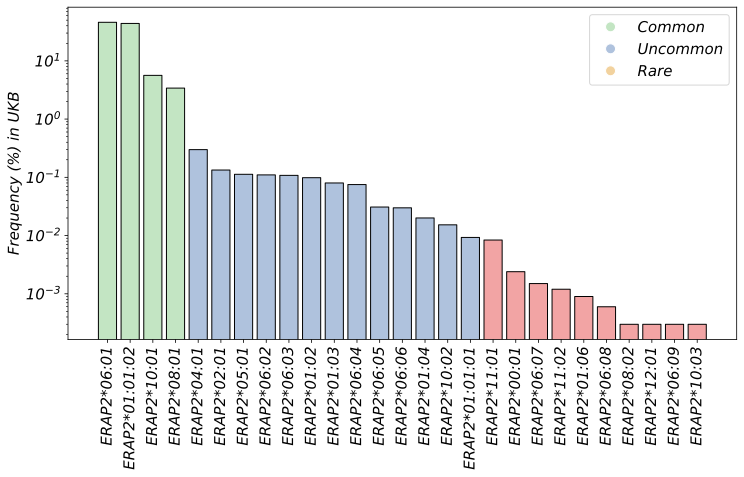

In [63]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
%config InlineBackend.figure_format='svg'

common_threshold = 3.4
uncommon_threshold = 0.00928  
rare_threshold = 0.008384 
color_map = []
for freq in hap_freq_percentage:
    if freq >= common_threshold:
        color_map.append('#C3E5C3') 
    elif uncommon_threshold <= freq < common_threshold:
        color_map.append('#AFC2DD')  
    elif rare_threshold <= freq < uncommon_threshold:
        color_map.append('#F2D29E') 
    else:
        color_map.append('#F2A4A4') 
plt.figure(figsize=(12, 6))
plt.bar(hap_freq_percentage.index, hap_freq_percentage.values, color=color_map, edgecolor='black')
font_prop = FontProperties(style='italic', size=15)
plt.xlabel(None)
plt.ylabel('Frequency (%) in UKB', fontproperties=font_prop) 
plt.xticks(rotation=90, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.yscale('log')
legend_labels = {
    'Common': '#C3E5C3',
    'Uncommon': '#AFC2DD',
    'Rare': '#F2D29E'
}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) 
                  for color in legend_labels.values()]
plt.legend(legend_handles, legend_labels.keys(), prop=font_prop)
plt.show()


In [ ]:
#Adding hap(al)lotype name according to nomeclature from 1000Genome
ERAP2_haplotypes=pd.read_csv("/hpc/dla_lti/araja/hapsnew/ERAP2/ERAP2_genotypeFinalnew.csv",  index_col='rsIDsa') #NewNomenclature
df1n=ERAP2_haplotypes
df2n=ERAP2_Haps_t
df1=pd.DataFrame(df1n)
df2=pd.DataFrame(df2n)
df2 = df2.astype(str)
df1 = df1.astype(str)
result_df = df2.copy()
result_df['allotype'] = ""
for i, row_df1 in df1.iterrows():
    matching_indices = []
    for j, row_df2 in df2.iterrows():
        if (row_df1.values == row_df2.values).all(): 
            matching_indices.append(j)
    if matching_indices:
        result_df.loc[matching_indices, 'allotype'] = 'Allotype' + str(i).zfill(2)
####this will add allotype column with names####
ERAP2_haplo=results_df

In [ ]:
####Presence of hap(al)otpye in individuals is now regarded as 1 and absence as 0
result_df23 = pd.DataFrame(index=ERAP2_haplo['rsIDsa'].unique())
for allotype in ERAP2_haplo['allotype'].unique():
    result_df23[allotype] = result_df23.index.isin(ERAP2_haplo[ERAP2_haplo['allotype'] == allotype]['rsIDsa']).astype(int)
result_df23.reset_index(inplace=True)
result_df23.rename(columns={'index': 'rsIDsa'}, inplace=True)
result_df23.fillna(0, inplace=True)
result_df23

In [ ]:
#Initially we added a and b to individuals samples as this is phased data but now removing it to treat it as individual samples####
file1=result_df23
file1['rsIDsa'] = file1['rsIDsa'].str.replace('[abAB]', '', regex=True)
file1

In [ ]:
###File including phenotype information#####
clinical=pd.read_csv("/hpc/dla_lti/araja/hapsnew/ERAP2/ClinicalDataHaps1.csv")

In [ ]:
###Merging hap(al)lotype data based on sample names
file1['rsIDsa'] = file1['rsIDsa'].astype(str)
clinical['rsIDsa'] = clinical['rsIDsa'].astype(str)
merged_data = pd.merge(file1, clinical, on='rsIDsa')
merged_data.to_csv('ERAP2haploCLinicalmerged.csv', sep=',')

In [ ]:
selected_columns = clinical.columns[1:]
counts = {"Column Name": [], "Cases (1 count)": []}
for col in selected_columns:
    counts["Column Name"].append(col)
    counts["Cases (1 count)"].append((clinical[col] == 1).sum())  
count_table = pd.DataFrame(counts)
count_table.to_csv('ERAP2ClinicalCountTableNew.csv', sep=',')